In [1]:
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np 
# from tiling_disk_plots import coordinates_plot
import tiling_disk_plots as tdp
import tiling_disk_utils as tdu

Determining the order of scanning one tile

In [2]:
from pathlib import Path
tile1_coords = tdu.read_coords('coordinates\coordinate-tile1.txt')
tile1_coords

,hex_nr,point,x,y
0,1.0,1.0,4.24,4.24
1,1.0,1.0,4.74,4.24
2,1.0,1.0,4.68,4.49
3,1.0,1.0,4.49,4.68
4,1.0,1.0,4.24,4.74
...,...,...,...,...
775,1.0,60.0,25.65,-7.24
776,1.0,60.0,25.83,-7.42
777,1.0,60.0,26.08,-7.49
778,1.0,60.0,26.33,-7.42


In [3]:
point_table = pd.pivot_table(tile1_coords, values=['x','y'], index=['hex_nr', 'point'],
                        aggfunc={
                            'x': np.mean,
                            'y': np.mean,})
# print(point_table)
point_table['x'] = point_table['x'].apply(lambda x: round(x,2))
point_table['y'] = point_table['y'].apply(lambda x: round(x,2))
tile1_coords = point_table

In [4]:
tile1_coords['x'].to_numpy()

array([  4.24,   3.36,   9.19,  12.56,  19.32,  17.32,  14.14,  10.  ,
         5.18,  -5.18, -10.  , -14.14, -17.32, -19.32, -12.56,  -9.19,
        -3.36,  -4.24,  -4.24,  -3.36,  -9.19, -12.56, -19.32, -17.32,
       -14.14, -10.  ,  -5.18,   5.18,  10.  ,  14.14,  17.32,  19.32,
        12.56,   9.19,   3.36,   4.24,  27.  ,  26.08,  23.38,  19.09,
        13.5 ,   6.99,   0.  ,  -6.99, -13.5 , -19.09, -23.38, -26.08,
       -27.  , -26.08, -23.38, -19.09, -13.5 ,  -6.99,   0.  ,   6.99,
        13.5 ,  19.09,  23.38,  26.08])

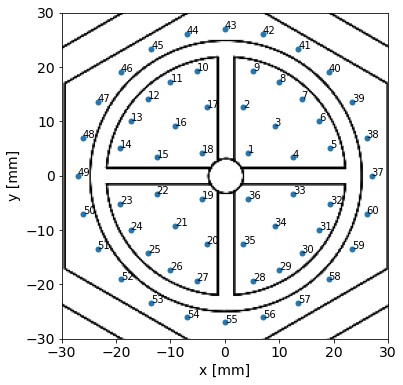

In [5]:
from pathlib import Path
hexgrid_path = Path.cwd().parent / 'tiled_disk_bilder' / 'Klebeplatte_75mm_with_nuten.png' # glue machine hex grid 
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(6,6))
ax.scatter(tile1_coords['x'], tile1_coords['y'], s=5**2, marker='o')
tdp.plot_hexgrid(hexgrid_path)
ax.set_xlabel("x [mm]", fontsize=14)
ax.set_ylabel("y [mm]", fontsize=14)
ax.tick_params(labelsize=14)
ax.set_xlim(-30, 30)
ax.set_ylim(-30, 30)
points = list(range(1,61,1))
for i, point in enumerate(points):
    # print(point)
    ax.annotate(f'{point}', (tile1_coords['x'].to_numpy()[i], tile1_coords['y'].to_numpy()[i]))


definition of rings - needed for measures with respect to the distence from the origin of a hexagon

In [6]:
ring_1 = [1, 36, 19, 18]
ring_2 = [2,3,4,33,34,35,20,21,22,15,16,17]
ring_3 = [9,8,7,6,5, 32,31,30,29,28,
          27,26,25,24,23, 14,13,12,11,10]
ring_4 = list(range(37, 61, 1))
print(ring_4)

[37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60]
